### ENSIMAG – Grenoble INP – UGA - Academic year 2024-2025
# Introduction to Statistical Learning and Applications ([website](https://github.com/ISLA-Grenoble/2025-main))

- Pedro L. C. Rodrigues -- `pedro.rodrigues@inria.fr`

- Alexandre Wendling -- `alexandre.wendling@univ-grenoble-alpes.fr`

***

### ⚠️ General guidelines for TPs

Each team shall upload its report on [Teide](https://teide.ensimag.fr/) before the deadline indicated at the course website. Please
**include the name of all members** of the team on top of your report.
The report should contain graphical representations and explanatory text. For each graph, axis names should be provided as well
as a legend when it is appropriate. Figures should be explained by a few sentences in the text. Answer to
the questions in order and refer to the question number in your report. Computations and
graphics have to be performed in `python`. The report should be written as a jupyter notebook. This is a file format that allows users to format documents containing text written in markdown and `python` instructions. You should include all of the `python` instructions that you have used in the document so that it may be possible to replicate your results.

***

# 🖥️ TP1: Analysis of prostate cancer data

A medical study done on patients with prostate cancer aims to analyze the correlation between the prostate tumor volume and a set of clinical and morphometric variables. These variables include prostate specific antigens, a biomarker for prostate cancer, and a number of clinical measures (age, prostate weight, etc). The goal of this lab is to build a regression model to predict the severity of cancer, expressed by logarithm of the tumor volume -- `lcavol` variable -- from the following predictors:
- `lpsa`: log of a prostate specific antigen
- `lweight`: log of prostate weight
- `age`: age of the patient
- `lbph`: log of benign prostatic hyperplasia amount
- `svi`: seminal vesicle invasion
- `lcp`: log of capsular penetration
- `gleason`: Gleason score (score on a cancer prognosis test)
- `pgg45`: percent of Gleason scores 4 or 5

The file `prostate.data`, available [here](https://github.com/ISLA-Grenoble/2025-main/blob/main/TP/TP1/prostate.data), contains measures of the logarithm of the tumor
volume and of the 8 predictors for 97 patients. This file also contains an additional variable, called `train`, which will
not be used and has to be removed.

# This lab is conducted by:  
ZAROUAL Hamza  
KASSAOUI Adil  
EL KOURI Yassine


## ▶️ Exercise 1: Preliminary analysis of the data (1 points)

**(a)** Download the file `prostate.data` and store it in your current folder. Read the dataset in using `pandas` as per
```
import pandas as pd
df = pd.read_csv("prostate.data", sep="\t")
```
check how to use function `df.drop` to remove the first and last columns of `df` containing useless tags.

In [5]:
import pandas as pd
df = pd.read_csv("prostate.data", sep="\t")
df = df.drop(columns=["Unnamed: 0","train"])

**(b)** The function defined below generates scatterplots (clouds of points) between all pairs of variables, allowing us to visually analyse the correlations between all variables in the dataframe. Explain what each line of function `pairplot` does and how it affects the final plot. You can use command `help` in the `python` shell to get the documentation of each function.

``` 
# import the main plotting library for python
import matplotlib.pyplot as plt

# make a pairplot from scratch
def pairplot(df, figsize=None):
    if figsize is None:
        figsize = (7.10, 6.70)
    n_vars = df.shape[1]
    fig, ax = plt.subplots(figsize=figsize, ncols=n_vars, nrows=n_vars)
    plt.subplots_adjust(
        wspace=0.10, hspace=0.10, left=0.05, right=0.95, bottom=0.05, top=0.95)
    for i in range(n_vars):
        for j in range(n_vars):
            axij = ax[i][j]
            i_name = df.columns[i]
            j_name = df.columns[j]
            axij.set_xticks([])
            axij.set_yticks([])
            axij.margins(0.1)
            if i != j:
                axij.scatter(df[i_name], df[j_name], s=10)
            else:
                axij.text(0.5, 0.5, i_name, fontsize=10,
                              horizontalalignment='center',
                              verticalalignment='center',
                              transform = axij.transAxes)        
    return fig, ax

fig, ax = pairplot(df)
plt.show()
```

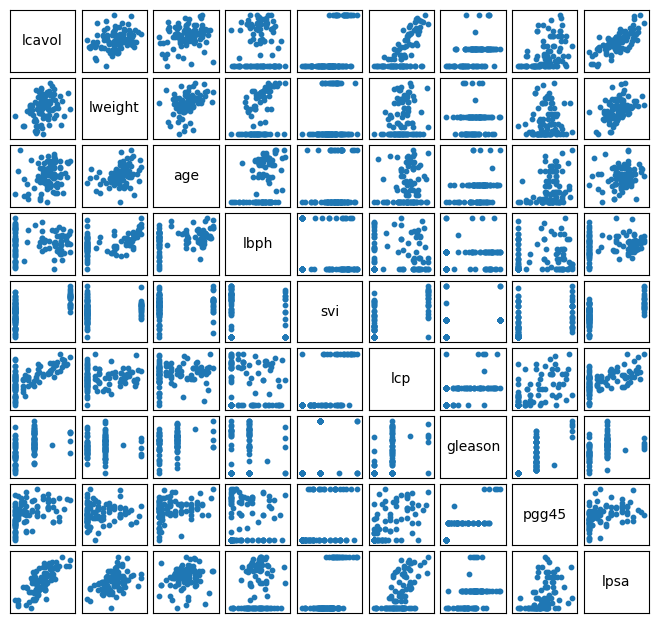

In [4]:
import matplotlib.pyplot as plt

# make a pairplot from scratch
def pairplot(df, figsize=None):
    if figsize is None:
        figsize = (7.10, 6.70)
    n_vars = df.shape[1]
    fig, ax = plt.subplots(figsize=figsize, ncols=n_vars, nrows=n_vars)
    plt.subplots_adjust(
        wspace=0.10, hspace=0.10, left=0.05, right=0.95, bottom=0.05, top=0.95)
    for i in range(n_vars):
        for j in range(n_vars):
            axij = ax[i][j]
            i_name = df.columns[i]
            j_name = df.columns[j]
            axij.set_xticks([])
            axij.set_yticks([])
            axij.margins(0.1)
            if i != j:
                axij.scatter(df[i_name], df[j_name], s=10)
            else:
                axij.text(0.5, 0.5, i_name, fontsize=10,
                              horizontalalignment='center',
                              verticalalignment='center',
                              transform = axij.transAxes)        
    return fig, ax

fig, ax = pairplot(df)
plt.show()


### Explaining the pairplot function:
The `pairplot` function generates scatterplots between all pairs of variables in the dataframe.

- `def pairplot(df, figsize=None):`: Defines the `pairplot` function, which takes a dataframe `df` and an optional `figsize` parameter.
- `if figsize is None: figsize = (7.10, 6.70)`: Sets the default figure size if `figsize` is not provided.
- `n_vars = df.shape[1]`: Gets the number of variables (columns) in the dataframe.
- `fig, ax = plt.subplots(figsize=figsize, ncols=n_vars, nrows=n_vars)`: Creates a figure and a grid of subplots with `n_vars` rows and columns.
- `plt.subplots_adjust(wspace=0.10, hspace=0.10, left=0.05, right=0.95, bottom=0.05, top=0.95)`: Adjusts the spacing between subplots.
- `for i in range(n_vars): for j in range(n_vars):`: Loops through each pair of variables.
- `axij = ax[i][j]`: Gets the subplot at position `(i, j)`.
- `i_name = df.columns[i]`: Gets the name of the `i`-th variable.
- `j_name = df.columns[j]`: Gets the name of the `j`-th variable.
- `axij.set_xticks([])`: Removes the x-axis ticks.
- `axij.set_yticks([])`: Removes the y-axis ticks.
- `axij.margins(0.1)`: Sets the margins for the subplot.
- `if i != j: axij.scatter(df[i_name], df[j_name], s=10)`: If `i` is not equal to `j`, creates a scatter plot of the `i`-th and `j`-th variables.
- `else: axij.text(0.5, 0.5, i_name, fontsize=10, horizontalalignment='center', verticalalignment='center', transform = axij.transAxes)`: If `i` is equal to `j`, displays the variable name in the center of the subplot.
- `return fig, ax`: Returns the figure and the array of subplots.


### Analyzing the Relationships Between Variables in the Dataset:

The diagram shows a grid of plots where each cell represents the relationship between two variables:

-Diagonal: The name of each variable is displayed in the cell where

-Off-diagonal: Scatter plots are drawn for each pair of distinct variables, allowing the visualization of correlations between them.

This provides an overview of the relationships within the DataFrame.


**(c)** Based on the generated figure, identify which variables seem the most correlated to `lcavol`. Also, infer the datatype for each of the predictors.

#### The goal is to determine the variable most correlated with lcoval
In analyzing the figure,we observe a strong positive correlation between `lcoval`and `lpsa`,indicated by a clear linear trend.The correlation between `lcoval`and `lweight` is moderately positive but not as strong as with `lpsa`.
On the other hand,when we look at the scatter plots for variables such as `age`,`lbph`,`svi`,`cp`,`gleason` and `pgg45`,we notice that the points are more dispersed with no clear linear relashionship with `lcoval`.This suggets that these variables are either weakly correlated with `lcoval`or have no discernible correlation at all.
In conclusion,lpsa is the most strongly correlated variable with lcoval,followed by lweight,while other variables show weak or no correlation.To verify our suggestion,we will calculate the correlation coefficient in the next section.


**(d)** Recall the formula of correlation between two vectors and implement it with `numpy`. Explain the difference of your result when compared to `df.corr()`. Change the function `pairplot`to show the correlation coefficient on the upper triangle of the subplots. (Bonus) Use locally weighted scatterplot smoothing (LOWESS) to see the trends between pairs of features with `statsmodels.nonparametric.smoothers_lowess`.

#### (d) 1-Explanation of Differences with df.corr():

-Formula Consistency:

Both methods compute the Pearson correlation coefficient, defined as the covariance divided by the product of standard deviations. Mathematically, they are identical, so results should match for clean data.

-Handling of Missing Values:

df.corr() automatically excludes NaN values pairwise.

The custom NumPy implementation assumes no missing values. To replicate df.corr(), explicitly handle NaN values (e.g., using np.nanmean).

-Numerical Precision:

Minor differences may arise due to floating-point precision, but these are negligible.

-Efficiency:

df.corr() is optimized for DataFrames and computes a full correlation matrix efficiently, while the custom function targets two vectors.

In [11]:
import numpy as np
# calculate correlation between two vectors
def correlation(x, y):
    covariance = np.cov(x, y, bias=True)[0][1]
    std_x = np.std(x)
    std_y = np.std(y)
    return covariance / (std_x * std_y)

# example illustrating the difference between the two approaches (using numpy and df.corr()
# Vectors containing NaN
X = np.array([1, 2, np.nan, 4, 5])
Y = np.array([1, 2,np.nan, 1, 4])
# Calculate correlation using numpy
corr_numpy = correlation(X, Y)

# Create a pandas DataFrame to calculate correlation
data_vectors = pd.DataFrame({'X': X, 'Y': Y})

# Calculate correlation using df.corr()
corr_pandas = data_vectors.corr().iloc[0, 1]  #le iloc nous permet d'acceder la valeur 0,1 dans le tableau

print(f"Correlation (numpy, without NaN) : {corr_numpy}")
print(f"Correlation (pandas, with NaN removal) : {corr_pandas}")




Correlation (numpy, without NaN) : nan
Correlation (pandas, with NaN removal) : 0.6454972243679028


/home/yassine/.local/lib/python3.10/site-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


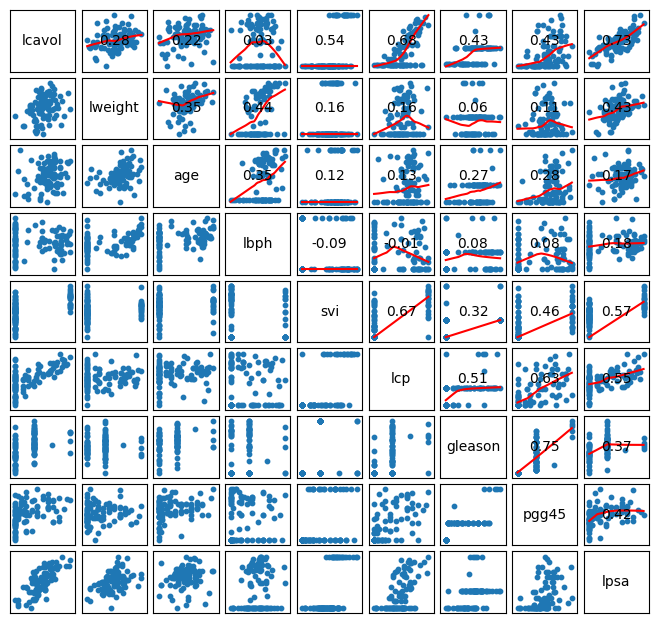

In [4]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# make a pairplot from scratch
def pairplot(df, figsize=None):
    if figsize is None:
        figsize = (7.10, 6.70)
    n_vars = df.shape[1]
    fig, ax = plt.subplots(figsize=figsize, ncols=n_vars, nrows=n_vars)
    plt.subplots_adjust(
        wspace=0.10, hspace=0.10, left=0.05, right=0.95, bottom=0.05, top=0.95)
    for i in range(n_vars):
        for j in range(n_vars):
            axij = ax[i][j]
            i_name = df.columns[i]
            j_name = df.columns[j]
            axij.set_xticks([])
            axij.set_yticks([])
            axij.margins(0.1)
            if i != j:
                axij.scatter(df[i_name], df[j_name], s=10)
                if i < j:
                    corr = df[i_name].corr(df[j_name])
                    axij.text(0.5, 0.5, f'{corr:.2f}', fontsize=10,
                                horizontalalignment='center',
                                verticalalignment='center',
                                transform = axij.transAxes)   
                    lowess = sm.nonparametric.lowess(df[j_name], df[i_name])
                    axij.plot(lowess[:, 0], lowess[:, 1], color='red')
            else:
                axij.text(0.5, 0.5, i_name, fontsize=10,
                              horizontalalignment='center',
                              verticalalignment='center',
                              transform = axij.transAxes)    
                
    return fig, ax

fig, ax = pairplot(df)
plt.show()

## ▶️ Exercise 2: Linear regression (7 points)

In this exercise, we will perform a multiple linear regression to build a predictive model for the `lcavol` variable. The variables `gleason` and `svi` should be considered as qualitative variables. You can declare them as such with

```
df['svi'] = df['svi'].astype("category")
df['gleason'] = df['gleason'].astype("category")
```

**(a)** Provide the mathematical equation of the regression model (note that you can use LaTeX to write equations) and define the diﬀerent parameters. 

####  Linear Regression Model

The equation of the model is given by:
$$
\texttt{lcavol} = \beta_0 + \beta_1 \texttt{lweight} + \beta_2 \texttt{age} + \beta_3 \texttt{lbph} + \beta_4 \texttt{lcp} + \beta_5 \texttt{pgg45} + \beta_6 \texttt{lpsa} + \delta \texttt{svi} + \gamma_7 \texttt{gleason7} + \gamma_8 \texttt{gleason8} + \gamma_9 \texttt{gleason9} + \varepsilon
$$

Where:

$\beta_0$ is the constant term of the equation.

$\beta_1,\beta_2, \dots, \beta_6$ are the coefficients for the continuous variables:
$\texttt{lweight}$,$\texttt{age}$,$\texttt{lbph}$,$\texttt{lcp}$,$\texttt{pgg45}$,$\texttt{lpsa}$.

$\gamma_7 ,\gamma_8 et \gamma_9$ are the coefficients for qualitative the gleason categories:$\texttt{gleason7}$ ,$\texttt{gleason8}$ et $\texttt{gleason9}$.    (one hot codage)

$\delta$ is the coefficient for the binary variable $\texttt{svi}$

$\varepsilon$ is the random error term, representing the difference between the observed values and the values predicted by the model.



In [12]:
df['svi'] = df['svi'].astype("category")
df['gleason'] = df['gleason'].astype("category")

**(b)** Before doing the linear regression of this TP, you will first have to handle the one-hot encoding of the categorical features of the dataframe. One way of doing this is as follows:

```
# encode the categorical features with dummy variables
df_enc = pd.get_dummies(df, dtype=np.float64)
# to drop one dummy column for each predictor
df_enc = df_enc.drop(columns=['svi_0', 'gleason_6'])
# add a column of ones to the dataframe
df_enc['intercept'] = 1
# extract the dataframe for predictors
X = df_enc.drop(columns=['lcavol'])
# get the observed values to predict
y = df['lcavol']
```

- Why did we fix a `dtype` in `pd.get_dummies`?
- Why did we drop two columns after the encoding?
- Why did we add a column of ones to the dataframe?

#### Reason for fixing the dtype to np.float64 in pd.get_dummies 
The answer is to ensure the dummy variables are stored as floating numbers,which are compatible with most machine learning models.This avoids potential issues with integer types and ensures consistency with other continuous variables.It also improves numerical stability for models that require floating-point operations.

#### Reason for dropping dummy columns after the encoding
We dropped two columns to avoid multicollinearity,as one of the dummy variables for each categorical feature serves as the reference category.Keeping all the dummy columns would create redundancy leading to perfect correlation.Removing them ensures the model remains identifiable.

#### Reason for adding a column of ones to the dataframe 
The column of ones is added to represent the intercept term in the linear regression model,which ensures that the model can make predictions even when all other predictors are zero.This allows the model to fit data more accurately by including a baseline value for the dependent variable.



In [13]:
import numpy as np
# encode the categorical features with dummy variables
df_enc = pd.get_dummies(df, dtype=np.float64)
# to drop one dummy column for each predictor
df_enc = df_enc.drop(columns=['svi_0', 'gleason_6'])
# add a column of ones to the dataframe
df_enc['intercept'] = 1
# extract the dataframe for predictors
X = df_enc.drop(columns=['lcavol'])
# get the observed values to predict
y = df['lcavol']



**(c)** We will use the [`statsmodels`](https://www.statsmodels.org/) package to estimate the coefficients of the multiple linear regression as per:

```
# import required package
import statsmodels.api as sm
# this line does not fit the regression model per se but only builds it
model = sm.OLS(y, X)
# now we actually fit the model, e.g. calculate all of regression parameters
results = model.fit()
```

Use command `results.sumary()` to get the statistical summary of the estimated coefficients. 

- Explain to what correspond the regression coeﬃcients for the lines related to `svi` and `gleason`. 

- What would have happened in the regression if we did not do the one-hot encoding from above?

- Comment the overall results of the regression as well.

In [15]:
# import required package
import statsmodels.api as sm
# this line does not fit the regression model per se but only builds it
model = sm.OLS(y, X)
# now we actually fit the model, e.g. calculate all of regression parameters
results = model.fit()

results.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lcavol   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     18.83
Date:                Tue, 29 Apr 2025   Prob (F-statistic):           9.05e-18
Time:                        16:29:38   Log-Likelihood:                -96.825
No. Observations:                  97   AIC:                             215.7
Df Residuals:                      86   BIC:                             244.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lweight       -0.0112      0.211     -0.053      0.958      -0.432       0.409
age            0.0248      0.011      2.205      0.030       0.002       0.047
lbph          -0.1042      0.058     -1.790      0.077      -0.220       0.012
lcp            0.4028      0.085      4.734      0.000       0.234       0.572
pgg45         -0.0094      0.005     -2.080      0.040      -0.018      -0.000
lpsa           0.5496      0.090      6.100      0.000       0.370       0.729
svi_1         -0.2204      0.256     -0.860      0.392      -0.730       0.289
gleason_7      0.3117      0.215      1.448      0.151      -0.116       0.740
gleason_8     -0.7106      0.759     -0.936      0.352      -2.219       0.798
gleason_9      0.7901      0.488      1.621      0.109      -0.179       1.759
intercept     -1.4067      0.874     -1.609      0.111      -3.145       0.332
==============================================================================
Omnibus:                        0.107   Durbin-Watson:                   2.306
Prob(Omnibus):                  0.948   Jarque-Bera (JB):                0.127
Skew:                          -0.073   Prob(JB):                        0.939
Kurtosis:                       2.900   Cond. No.                         884.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Explanation of Regression Coefficients for `svi` and `gleason`
-`svi_1`:The coefficient for `svi_1` is $-0.2204$.This means that,holding all other variables constant is associated with a decrease of $0.2204$ in the `lcoval`.However,this coefficient is not statistically significant because of its $p-value=0.392>0.05$.

-`gleason7`:The coefficient for `gleason7` is $0.3117$.This means that,holding all other variables constant is associated with a increase of $0.3117$ in the `lcoval`.However,this coefficient is not statistically significant because of its $p-value=0.151>0.05$.

-`gleason8`:The coefficient for `gleason8` is $-0.7106$.This means that,holding all other variables constant is associated with a decrease of $0.7106$ in the `lcoval`.However,this coefficient is not statistically significant because of its $p-value=0.352>0.05$.

-`gleason9`:The coefficient for `gleason9` is $0.7901$.This means that,holding all other variables constant is associated with a increase of $0.7901$ in the `lcoval`.However,this coefficient is not statistically significant because of its $p-value=0.109>0.05$.

## Impact of Not Doing One-Hot Encoding

-If we did not perform one-hot encoding for the categorical variables `svi`and `gleason,the regression model would not be able to correctly interpret these variables.The model would treat them as continuous variables,which would to incorrect and misleading results.Also,using integer can introduce bias,as the model might assign unintended importance to certain categories based on their numerical values.

## Overall Results of the Regression
-R-squared=$0.686$:This indicates that approximately $68.6\%$ of the variability in `lcoval`is explained by the model.This suggests a good fit of the model to the data.However, about $31.4\%$ of the variance is not explained by the model,indicating that there are other factors not included in the model that influence `lcoval`.

-Adjusted R-squared=$0.650$: The model is reasonably well-adjusted, and the slight decrease from R-squared suggests the model is penalizing unnecessary variables appropriately.

-F-statistic=$18.83$  ($p-value = 9.05 \times 10^{-18}$)  : The overall model is highly significant, meaning that the independent variables collectively have a strong impact on `lcoval`.

-AIC=$215.7$ and BIC=$244.0$:These criteria help compare different models. Lower values indicate a better model fit.



**(d)** Use `results.conf_int` to get confidence intervals of level 95% for all the coeﬃcients of the predictors. Comment the results.

In [16]:
results.conf_int()

,0,1
lweight,-0.431600,0.409107
age,0.002436,0.047129
lbph,-0.219914,0.011515
lcp,0.233639,0.571880
pgg45,-0.018469,-0.000419
lpsa,0.370474,0.728673
svi_1,-0.730029,0.289190
gleason_7,-0.116263,0.739616
gleason_8,-2.219087,0.797911
gleason_9,-0.179004,1.759273


#### Comment on the Results
-`lweight`:We are $95\%$ confident that the true coefficient lies between $-0.431600$ and $0.409107$.Since this interval includes $0$,it suggests that `lweight`may have no significant effect on the `lcoval`.

-`age`:We are $95\%$ confident that the true coefficient lies between $0.002436$ and $0.047129$.Since this interval does not include $0$,it suggests that `age` likely has a significant effect on the `lcoval`.

-`lbph`:We are $95\%$ confident that the true coefficient lies between $-0.219914$ and $0.011515$.Since this interval includes $0$,it suggests that `lbph`may have no significant effect on the `lcoval`.

-`lcp`:We are $95\%$ confident that the true coefficient lies between $0.233639$ and $0.571880$..Since this interval does not include $0$,it suggests that `lbph` likely has a significant effect on the `lcoval`.

-`pgg45`:We are $95\%$ confident that the true coefficient lies between $-0.018469$ and $-0.000419$..Since this interval does not include $0$,it suggests that `pgg45` likely has a significant effect on the `lcoval`.

-`lpsa`:We are $95\%$ confident that the true coefficient lies between $0.370474$ and $0.728673$..Since this interval does not include $0$,it suggests that `lpsa` likely has a significant effect on the `lcoval`.

-`svi_1`:We are $95\%$ confident that the true coefficient lies between $-0.730029$ and $0.289190$.Since this interval includes $0$,it suggests that `svi_1`may have no significant effect on the `lcoval`.

-`gleason_7`:We are $95\%$ confident that the true coefficient lies between $-0.116263$ and $0.739616$.Since this interval includes $0$,it suggests that `gleason_7`may have no significant effect on the `lcoval`.

-`gleason_8`:We are $95\%$ confident that the true coefficient lies between $-2.219087$ and $0.797911$.Since this interval includes $0$,it suggests that `gleason_8`may have no significant effect on the `lcoval`.

-`gleason_9`:We are $95\%$ confident that the true coefficient lies between $-0.179004$ and $1.759273$.Since this interval includes $0$,it suggests that `gleason_9`may have no significant effect on the `lcoval`.

-`intercept`:We are $95\%$ confident that the true coefficient lies between $-3.145013$ and $0.331705$.Since this interval includes $0$,it suggests that `intercept`may have no significant effect on the `lcoval`.




**(e)** What can you say about the eﬀects of the `lpsa` variable? Relate your answer to the $p$-value of a hypothesis test and a confidence interval. You can use `results.pvalues`.

In [9]:
results.pvalues

lweight      9.577075e-01
age          3.014993e-02
lbph         7.695609e-02
lcp          8.577858e-06
pgg45        4.047741e-02
lpsa         2.939241e-08
svi_1        3.922717e-01
gleason_7    1.512950e-01
gleason_8    3.516744e-01
gleason_9    1.087313e-01
intercept    1.113676e-01
dtype: float64

The p-value for `lpsa` is $2.939241 \times 10^{-8}$,which is extremely small than a common significance level(such as $0.05$).This means that the null hypothesis(which states that the coefficient for lpsa is zero) can be rejected with a very high level of confidence and conlude that `lpsa` significantly effects the model's outcome:`lcoval`.Additionnaly,the $95\%$ confidence interval for the coefficient of `lpsa`is $[0.370474 ; 0.728673]$,which doesn't include zero.This further supports the conclusion that `lpsa`has a statistically significant positive effect on `lcoval`.

**(f)** Implement yourself a function that calculates the values of the parameters and their corresponding $p$-values. Bonus: explain why `numpy.linalg.inv` is not necessarily the best choice for estimating the parameters as compared to `numpy.linalg.solve`.

In [28]:
from scipy import stats

def ols_coef_pvalues(X, y):
    # Step 1: Estimate the coefficients (beta_hat) using the OLS formula
    # beta_hat = (X^T * X)^-1 * (X^T * y)
    beta_hat = np.linalg.solve(X.T @ X,X.T @ y)
    # Step 2: Compute the residuals
    residuals = y - X @ beta_hat
    # Step 3: Compute the variance of residuals
    residuals_var = np.sum(residuals**2) /(X.shape[0] - X.shape[1])
    # Step 4: Compute the variance-covariance matrix of the estimated coefficients
    var_beta_hat = residuals_var * np.linalg.inv(X.T @ X)
    # Step 5: Compute the standard errors of the coefficients
    err_beta_hat = np.sqrt(np.diag(var_beta_hat))
    # Step 6: Compute the t-statistics for each coefficient 
    t_values = beta_hat / err_beta_hat
    # Step 7: Compute the p-values for each coefficient using the t-distribution
    p_values = 2 * (1-stats.t.cdf(np.abs(t_values), df=X.shape[0]-X.shape[1]))
    # Step 8: Extract the feature names
    feature_names = X.columns
    return {name: {'Coefficient': coef, 'p-value': pval} for name, coef, pval in zip(feature_names, beta_hat, p_values)}


Output = ols_coef_pvalues(X, y)
print(Output)

#Store the dataset for further analysis
data_set = X


{'lweight': {'Coefficient': np.float64(-0.011246199275619375), 'p-value': np.float64(0.9577074892463029)}, 'age': {'Coefficient': np.float64(0.024782414427473396), 'p-value': np.float64(0.03014992804212313)}, 'lbph': {'Coefficient': np.float64(-0.10419954235704927), 'p-value': np.float64(0.07695608793735187)}, 'lcp': {'Coefficient': np.float64(0.4027596158119569), 'p-value': np.float64(8.57785823571433e-06)}, 'pgg45': {'Coefficient': np.float64(-0.00944383493354224), 'p-value': np.float64(0.04047740676561995)}, 'lpsa': {'Coefficient': np.float64(0.5495731003742182), 'p-value': np.float64(2.9392406508677027e-08)}, 'svi_1': {'Coefficient': np.float64(-0.2204193648676966), 'p-value': np.float64(0.3922716944204583)}, 'gleason_7': {'Coefficient': np.float64(0.3116761867677301), 'p-value': np.float64(0.15129499053107498)}, 'gleason_8': {'Coefficient': np.float64(-0.7105882154496439), 'p-value': np.float64(0.3516744482417493)}, 'gleason_9': {'Coefficient': np.float64(0.7901345521616435), 'p-v

## why numpy.linalg.inv is not necessarily the best choice
Using `numpy.linalg.inv` to calculate the inverse of a matrix can be numerically unstable and inefficient, especially for large matrices. Instead, `numpy.linalg.solve` is often preferred for solving linear systems of equations.

Computing the inverse explicitly can introduce significant numerical errors, reducing the precision of the solution, especially when the matrix is ill-conditioned. Additionally, matrix inversion has a higher computational complexity (O($n^{3})$) compared to solving a system directly, making it less efficient. `numpy.linalg.solve` avoids these issues by leveraging optimized numerical techniques, ensuring higher precision and stability in the solution.

**(g)** Plot the predicted values of `lcavol` as a function of the actual values. For this, you can can use `results.get_prediction` to get predictions over `X` and then get its `predicted_mean` attribute.

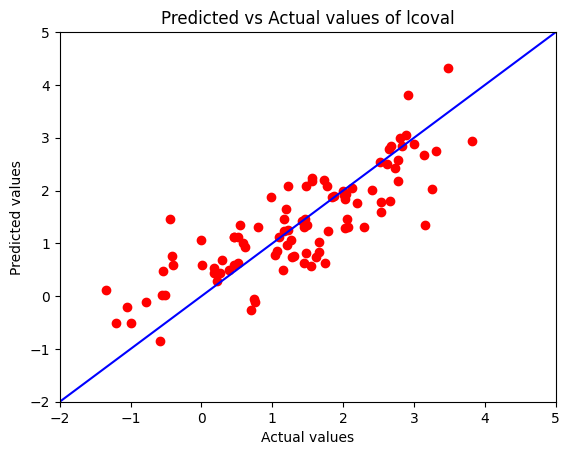

In [29]:
predictions = results.get_prediction(X)
predictions_values = predictions.predicted_mean
plt.scatter(y, predictions_values, color='red')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.xlim(-2, 5)
plt.ylim(-2, 5)
plt.title('Predicted vs Actual values of lcoval')
plt.plot([-2,5], [-2,5], color='blue', linestyle='-', label='Bisection Line (y = x)')
plt.show()


#### Alignment with the Bisector and Prediction Accuracy

The majority of the points appear to be relatively close to the bisector, particularly at the beginning, which indicates that the model has a good predictive capability. However, some dispersion is observed as the values increase.

The $y = x$ line (bisector) represents the ideal situation where the predicted values are exactly equal to the actual values. Any point located on this line signifies a perfect prediction. Thus, the more the red points align with this line, the more accurate the model is.

**(h)** Plot the histogram of residuals as well as their qq-plot using `statsmodels` function `qqplot`. Can we admit that the residuals are normally distributed? Compute the residual sum of squares (RSS).

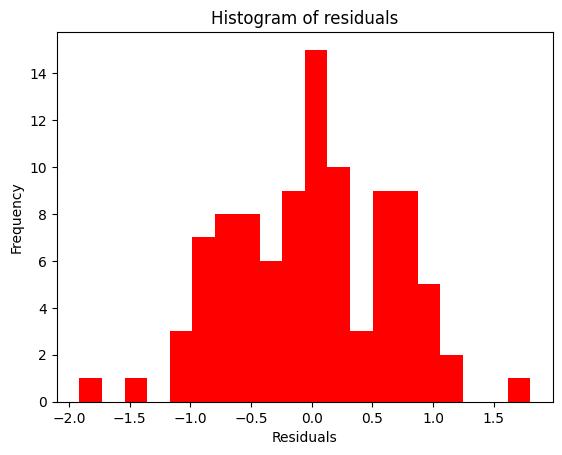

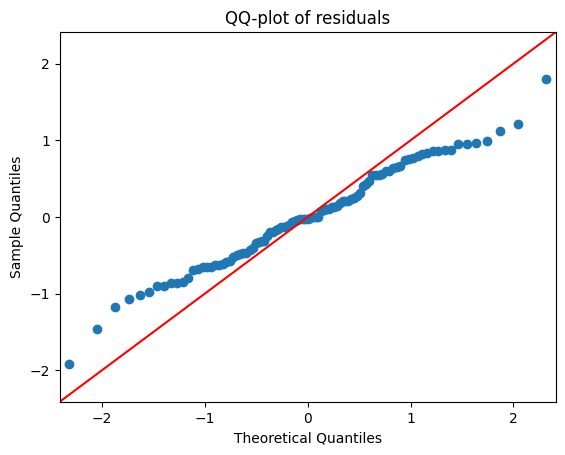

Residual sum of squares RSS is : 41.81406860804535


In [30]:
residuals = y - predictions_values
plt.hist(residuals, bins=20, color='red')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of residuals')
plt.show()

sm.qqplot(residuals, line ='45')
plt.title('QQ-plot of residuals')
plt.show()

RSS = np.sum(residuals**2)
print("Residual sum of squares RSS is :" , RSS)





#### Analysis of Residuals Distribution
The histogram of residuals shows a roughly symmetric distribution around zero, indicating unbiased predictions. The spread of residuals suggests variability in prediction errors. A few extreme values at the tails may indicate outliers or model limitations. While the model performs reasonably well, further investigation could improve handling of extreme cases.

#### Analysis of QQ-Plot of Residuals

The QQ-plot compares the sample quantiles of the residuals to the theoretical quantiles of a normal distribution. The plot shows that the residuals generally follow a straight line, indicating that they are approximately normally distributed. However, there are slight deviations at the tails, suggesting potential outliers or heavier tails than a normal distribution. This aligns with the histogram analysis, where extreme values were noted. Overall, the model's residuals are reasonably normal, but attention to extreme values could enhance model accuracy.
If the goal is statistical inference, strict normality may be necessary. However, for prediction tasks, slight deviations are not necessarily problematic.

**(i)** What happens if predictors `lpsa` and `lcp` are removed from the multiple linear regression model? Note that you can pass a list of strings to `df.columns.drop` method.

                            OLS Regression Results                            
Dep. Variable:                 lcavol   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     8.390
Date:                Mon, 17 Mar 2025   Prob (F-statistic):           2.11e-08
Time:                        18:09:42   Log-Likelihood:                -125.58
No. Observations:                  97   AIC:                             269.2
Df Residuals:                      88   BIC:                             292.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lweight        0.5850      0.259      2.257      0.0

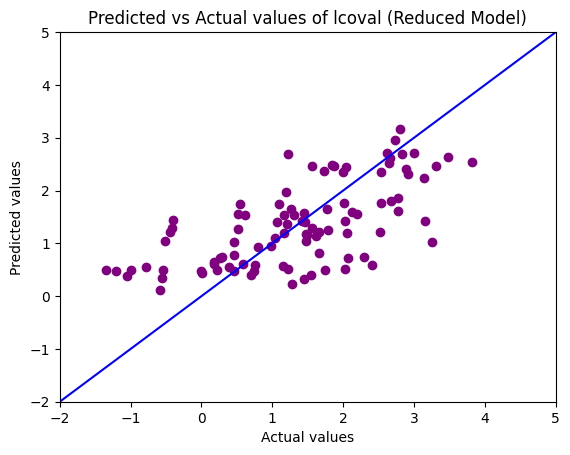

Residual sum of squares RSS for Reduced Model is : 75.65323290824035


In [13]:
X_reduced = X.drop(columns=['lpsa', 'lcp'])
model_reduced = sm.OLS(y, X_reduced)
results_reduced = model_reduced.fit()
print(results_reduced.summary())
predictions_reduced = results_reduced.get_prediction(X_reduced).predicted_mean
plt.scatter(y, predictions_reduced, color='purple')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.xlim(-2, 5)
plt.ylim(-2, 5)
plt.plot([-2,5], [-2,5], color='blue', linestyle='-', label='Bisection Line (y = x)')
plt.title('Predicted vs Actual values of lcoval (Reduced Model)')
plt.show()

residuals_reduced = y - predictions_reduced
RSS_reduced = np.sum(residuals_reduced**2)
print("Residual sum of squares RSS for Reduced Model is :" , RSS_reduced)


This graph shows the actual and predicted values of `lcoval` after removing the variables `lcp` and `lpsa`, significant variables in the model.  

### Comparison with the Initial Model
- Compared to the previous model, the dispersion of points has increased, with more pronounced deviations between actual and predicted values.  
- More points are farther from the bisector, indicating a reduced accuracy of the model.  

### Why Does RSS Increase?
- The **RSS (Residual Sum of Squares)** represents the sum of squared errors between predicted and actual values.  
- With the removal of `lcp` and `lpsa`, the model makes more errors as it no longer accurately captures variations in `lcoval`.  
- This loss of precision explains the increase in RSS, confirming that these variables played a key role in predicting `lcoval`.

## What happens if predictors `lpsa` and `lcp` are removed from the multiple linear regression model

When the predictors lpsa and lcp are removed from the multiple linear regression model, we can observe several key changes:

-R-squared:
The original model has an R-squared of $0.686$, while the reduced model has an the reduced model has an R-squared of $0.433$, which is much lower.This significant decrease suggests that `lpsa` and `lcp` were important contributors to explaining the variance in the dependent variable.

-Coefficients:
In the original model, both `lpsa` and `lcp` have significant p-values, with `lpsa` having a coefficient of $0.5496$ and `lcp` having a coefficient of $0.4028$. These variables were contributing meaningfully to the model.

-Residual Sum of Squares (RSS):
The RSS for the original model is $41.814$, while for the reduced model, it is $75.653$. This increase in RSS indicates that the reduced model has a worse fit, as it fails to explain as much of the variance in `lcavol`. The higher RSS in the reduced model confirms that removing `lpsa` and `lcp` worsens the model's accuracy.

## ▶️ Exercise 3: Best subset selection (5 points)

A regression model that uses $k$ predictors is said to be of size $k$. For instance, 

$$
\texttt{lcavol} = \beta_1 \texttt{lpsa} + \beta_0 + \varepsilon \quad \text{and} \quad \texttt{lcavol} = \beta_1 \texttt{lweight} + \beta_0 + \varepsilon
$$

are models of size one. The regression model without any predictor $\texttt{lcavol} = \beta_0 + \varepsilon$ is a model of size 0.

The goal of this exercise is to select the best model of size $k$ for each $k \in \{0, \dots, 8\}$.

**(a)** Compute the residual sums of squares (RSS) for all models of size $k = 2$. Which model has the smallest RSS? Note that you can use a generator [`itertools.combination`](https://docs.python.org/3/library/itertools.html#itertools.combinations) to automatize for you all the combinations of $k$ elements among $n$.

**(b)** For each value of $k \in \{0, \dots, 8\}$, select the set of predictors that minimizes the RSS. Plot these values as a function of $k$. Provide the names of the selected predictors for each value of $k$.

**(c)** Do you think that minimizing the residual sum of squares is well suited to select the optimal size for the regression models? Justify your answer using what you've learned in class.

##  a-the model with the smallest RSS


In [31]:
import itertools
combinations = itertools.combinations(df.drop(columns=['lcavol']).columns, 2)

min_RSS = 200
best_combo = 0

for combo in combinations:
    if 'gleason' not in combo and 'svi' not in combo:
        X_partial = X[list(combo)]
    else:
        modified_combo = []
        if 'svi' in combo:
            modified_combo.append('svi_1')
        if 'gleason' in combo:
            modified_combo += ['gleason_7', 'gleason_8', 'gleason_9']
        modified_combo += [col for col in combo if col not in {'svi', 'gleason'}]  # Ajouter les autres colonnes
        X_partial = X[modified_combo]

    X_partial['intercept'] = 1  # Ajouter l'intercept

    # Ajustement du modèle OLS
    model_partial = sm.OLS(y, X_partial)
    results_partial = model_partial.fit()

    # Calcul du RSS (Residual Sum of Squares)
    RSS_partial = np.sum((y - results_partial.predict(X_partial))**2)
    print(f"RSS for {combo} is {RSS_partial}")
    
    # Mettre à jour la combinaison avec le plus petit RSS
    if RSS_partial < min_RSS:
        min_RSS = RSS_partial
        best_combo = combo

print(f"The pair with the smallest RSS is {best_combo} with a RSS of {min_RSS}")


RSS for ('lweight', 'age') is 120.40250122702454
RSS for ('lweight', 'lbph') is 121.31398244672992
RSS for ('lweight', 'svi') is 89.34527015479905
RSS for ('lweight', 'lcp') is 68.60764878652884
RSS for ('lweight', 'gleason') is 92.1621856724936
RSS for ('lweight', 'pgg45') is 100.89502527465433
RSS for ('lweight', 'lpsa') is 61.18712133443477
RSS for ('age', 'lbph') is 126.20550788457382
RSS for ('age', 'svi') is 91.1061939836275
RSS for ('age', 'lcp') is 69.93020614440238
RSS for ('age', 'gleason') is 97.84635355315187
RSS for ('age', 'pgg45') is 106.68068565767825
RSS for ('age', 'lpsa') is 60.03569673480601
RSS for ('lbph', 'svi') is 93.90983320517357
RSS for ('lbph', 'lcp') is 72.40419329881722
RSS for ('lbph', 'gleason') is 98.7189640900131
RSS for ('lbph', 'pgg45') is 108.27431962102187
RSS for ('lbph', 'lpsa') is 59.90978928206386
RSS for ('svi', 'lcp') is 70.80917326398931
RSS for ('svi', 'gleason') is 80.94377967202769
RSS for ('svi', 'pgg45') is 88.73558091767433
RSS for ('s

/tmp/ipykernel_7460/1270586012.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_partial['intercept'] = 1  # Ajouter l'intercept
/tmp/ipykernel_7460/1270586012.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_partial['intercept'] = 1  # Ajouter l'intercept
/tmp/ipykernel_7460/1270586012.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

The model with the smallest RSS is for the pair (`lcp`, `lpsa`), with an RSS value of $47.27809728978648$.

## b-Optimization of Predictors: minimizing RSS for each value of k

/tmp/ipykernel_9662/3340177927.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_partial['intercept'] = 1
/tmp/ipykernel_9662/3340177927.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_partial['intercept'] = 1
/tmp/ipykernel_9662/3340177927.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

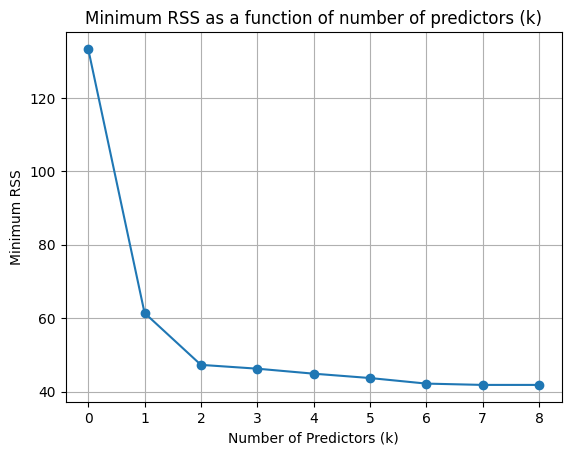

For k = 0, the selected predictors are: [] the corresponding RSS is: 133.35903388922304
For k = 1, the selected predictors are: ['lpsa'] the corresponding RSS is: 61.42090741678992
For k = 2, the selected predictors are: ['lcp', 'lpsa'] the corresponding RSS is: 47.27809728978648
For k = 3, the selected predictors are: ['age', 'lcp', 'lpsa'] the corresponding RSS is: 46.237825150928
For k = 4, the selected predictors are: ['age', 'lbph', 'lcp', 'lpsa'] the corresponding RSS is: 44.87840603234042
For k = 5, the selected predictors are: ['gleason_7', 'gleason_8', 'gleason_9', 'age', 'lcp', 'pgg45', 'lpsa'] the corresponding RSS is: 43.68997319050834
For k = 6, the selected predictors are: ['gleason_7', 'gleason_8', 'gleason_9', 'age', 'lbph', 'lcp', 'pgg45', 'lpsa'] the corresponding RSS is: 42.17393288847962
For k = 7, the selected predictors are: ['svi_1', 'gleason_7', 'gleason_8', 'gleason_9', 'age', 'lbph', 'lcp', 'pgg45', 'lpsa'] the corresponding RSS is: 41.81544394741466
For k = 8

In [15]:
# Initialize two empty lists to store the minimum RSS values and the best predictor combinations
min_RSS_values = []
best_combos = []

# Loop
for k in range(9):
    # Generate all combinations of predictors of size k
    combinations = itertools.combinations(df.drop(columns=['lcavol']).columns, k)

    min_RSS = 1000
    best_combo = None

    # Loop
    for combo in combinations:
        modified_combo = []
        
        # Handle 'svi' and 'gleason' modifications
        if 'svi' in combo:
            modified_combo.append('svi_1')
        if 'gleason' in combo:
            modified_combo += ['gleason_7', 'gleason_8', 'gleason_9']
        
        # Add other columns that are not 'svi' or 'gleason'
        modified_combo += [col for col in combo if col not in {'svi', 'gleason'}]
        
        X_partial = X[modified_combo]
        
        # Add intercept column
        X_partial['intercept'] = 1
        
        # Fit the OLS model
        model_partial = sm.OLS(y, X_partial)
        results_partial = model_partial.fit()
        
        # Compute RSS
        RSS_partial = np.sum((y - results_partial.predict(X_partial))**2)
        
        # Update the best combination if the RSS is lower
        if RSS_partial < min_RSS:
            min_RSS = RSS_partial
            best_combo = modified_combo

    # Store the minimum RSS and corresponding combination of predictors
    min_RSS_values.append(min_RSS)
    best_combos.append(best_combo)

# Plot RSS as a function of k
plt.plot(range(9), min_RSS_values, marker='o')
plt.xlabel('Number of Predictors (k)')
plt.ylabel('Minimum RSS')
plt.title('Minimum RSS as a function of number of predictors (k)')
plt.grid(True)
plt.show()

# Print the names of the selected predictors for each k and the corresponding RSS
for k in range(9):
    print(f"For k = {k}, the selected predictors are: {best_combos[k]}", "the corresponding RSS is:", min_RSS_values[k])


#### Analysis of Minimum RSS vs. Number of Predictors

The plot shows the relationship between the minimum Residual Sum of Squares (RSS) and the number of predictors (k). As the number of predictors increases, the minimum RSS decreases, indicating improved model fit with more predictors. However, the rate of decrease slows down after a certain point, suggesting diminishing returns. This implies that adding more predictors beyond a certain number may not significantly enhance model performance. Careful consideration is needed to balance model complexity and predictive accuracy.


## (c) RSS and Model Selection
Minimizing the residual sum of squares (RSS) can be a useful approach for selecting the optimal size for regression models, but it may not always be the best criterion. While a lower RSS indicates a better fit to the data, it can also lead to overfitting, where the model becomes too complex and captures noise rather than the underlying trend. This is especially a concern in polynomial regression, where increasing the degree results in a decreasing RSS but may not generalize well to new data. To address this, techniques like cross-validation, AIC, or BIC are often preferred, as they penalize model complexity, providing a better balance between fit and generalization. Thus, minimizing RSS alone may not always ensure the optimal model size.

## ▶️ Exercise 4: Split-validation (5 points)

You have now found the best model for each of the nine possible model sizes. In the following, we wish to compare these nine diﬀerent regression models.

**(a)** Give a brief overview of split-validation: how it works? Why it is not subject to the same issues raised in
the item (c) of the previous Exercise?

**(b)** Use function `train_test_split` from the `sklearn` package to split the dataset into a training and a validation (or test) partition. You can set `test_size=0.3`. For each of the nine models from before (i.e. those that minimized the RSS for each size $k$), compute the mean prediction error calculated over the samples from the test set and compare it to its corresponding mean training error. Plot a curve for each of these error as a function of size $k$. 

**(c)** Based on the previous results, choose the best model for this dataset, giving the parameter estimates for the model trained on the whole dataset (i.e. without splitting), and explain your choice.

**(d)** What is the main limitation of split-validation ? Illustrate this issue on the cancer dataset. What could
you do to address this problem? Code such alternative method and comment the result. Note that `sklearn` can provide you with many choices. See [here](https://scikit-learn.org/stable/model_selection.html) for more information.

#### (a) Brief Overview of Split-validation

Split-validation involves dividing the data into two subsets: a training set and a test set. The training set is used to fit the model, while the test set evaluates its performance on unseen data. This method helps assess the model’s generalization ability and prevents overfitting.

Unlike RSS minimization, split-validation avoids selecting an overly complex model that perfectly fits the training data but generalizes poorly.

#### (b)Experimentation with `train_test_split`

For k = 0, the selected predictors are: []
Training Error: 1.3003297228803645, Test Error: 1.5853556184408277

For k = 1, the selected predictors are: ['lpsa']
Training Error: 0.5755178443806056, Test Error: 0.7812324440369813

For k = 2, the selected predictors are: ['lcp', 'lpsa']
Training Error: 0.4622086567819878, Test Error: 0.5754303217408927

For k = 3, the selected predictors are: ['age', 'lcp', 'lpsa']
Training Error: 0.4507619848408543, Test Error: 0.5637364055456092

For k = 4, the selected predictors are: ['age', 'lbph', 'lcp', 'lpsa']
Training Error: 0.438151511611325, Test Error: 0.5523339510114048

For k = 5, the selected predictors are: ['gleason_7', 'gleason_8', 'gleason_9', 'age', 'lcp', 'pgg45', 'lpsa']
Training Error: 0.42502391882643475, Test Error: 0.5564347700550172

For k = 6, the selected predictors are: ['gleason_7', 'gleason_8', 'gleason_9', 'age', 'lbph', 'lcp', 'pgg45', 'lpsa']
Training Error: 0.41339689585695605, Test Error: 0.5516360672443622

For k = 7, 

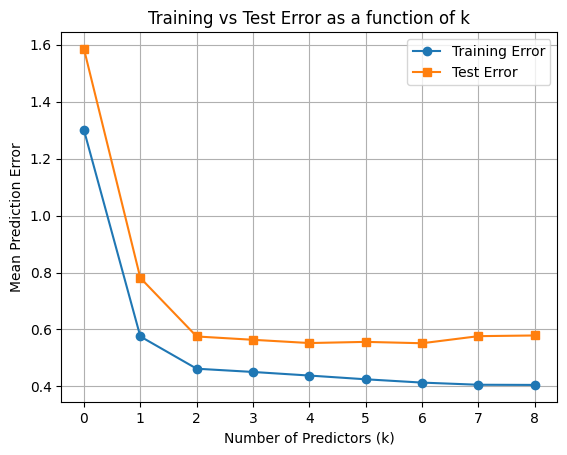

In [16]:
from sklearn.model_selection import train_test_split

# Split the dataset into training (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(data_set, y, test_size=0.3, random_state=42)

train_errors = []
test_errors = []

# Loop
for k in range(9):
    best_combo = best_combos[k]  
    
    # Add intercept column
    X_train_partial = X_train[list(best_combo) + ['intercept']]
    X_test_partial = X_test[list(best_combo) + ['intercept']]

    # Fit the OLS model
    model = sm.OLS(y_train, X_train_partial).fit()
    
    # Predictions
    y_train_pred = model.predict(X_train_partial)
    y_test_pred = model.predict(X_test_partial)
    
    # Compute the mean prediction error
    train_error = np.mean((y_train - y_train_pred) ** 2)
    test_error = np.mean((y_test - y_test_pred) ** 2)

    train_errors.append(train_error)
    test_errors.append(test_error)

    # Print the selected predictors and the errors
    print(f"For k = {k}, the selected predictors are: {best_combo}")
    print(f"Training Error: {train_error}, Test Error: {test_error}\n")

# Plot the training and test errors as a function of k
plt.plot(range(9), train_errors, marker='o', label="Training Error")
plt.plot(range(9), test_errors, marker='s', label="Test Error")
plt.xlabel('Number of Predictors (k)')
plt.ylabel('Mean Prediction Error')
plt.title('Training vs Test Error as a function of k')
plt.legend()
plt.grid(True)
plt.show()


We use the train_test_split function from sklearn to split the data into a training set (70%) and a test set (30%). For each optimized model based on RSS, we compute the mean prediction error on the test samples and compare it to the mean training error.

#### Analysis of Training vs Test Error as a Function of k

The plot illustrates the relationship between the number of predictors (k) and the mean prediction error for both training and test datasets. The training error decreases as more predictors are added, reflecting the model's improved fit to the training data. However, the test error initially decreases but then starts to increase after a certain point($k=4$), indicating overfitting. This suggests that while adding predictors improves performance on the training data, it may harm generalization to unseen data. The optimal number of predictors appears to be where the test error is minimized, balancing model complexity and predictive accuracy.

#### (c) Choosing the Best Model
The optimal model for this dataset appears to be the one with $k = 4$, where the selected predictors are:


{`age`, `lbph`, `lcp`, `lpsa`}

To choose this model as the best, several criteria need to be considered.

-Balance between complexity and performance:

The model with $k = 4 $ offers a good balance between the number of predictors used and the performance achieved. Increasing the number of predictors (for example, for $k = 5 $ or $k = 6$) slightly reduces the test error, but this reduction is not significant. Moreover, adding more predictors makes the model more complex, which can increase the risk of overfitting, where the model learns too many specific details from the training data and becomes less effective on new data.


-Comparison with other models:

For values of $ k $ greater than $4$, the test error starts to increase. This suggests that adding more predictors does not necessarily lead to a better model and may even worsen performance on the test set due to increased complexity and a reduced ability to generalize.


#### (d) 1-Limitations of Split-validation

The main limitation of split-validation is the high variance in model results depending on how the data is partitioned. A single split may not reflect the model's overall performance, especially with small datasets, leading to biased evaluations. For example, in the cancer dataset, a model with many predictors (such as $k=7$) may perform well on the training set but fail on the test set if the partition is not representative of the overall data distribution.

This can lead to overfitting, where the model captures irrelevant details from the training data and fails to generalize. Furthermore, this method does not provide a reliable measure of model stability, as performance can vary depending on the chosen data partition. This can result in overconfidence in the results if the test set is more aligned with the characteristics of the training data and does not account for issues such as class imbalance.




#### (d) 2-Alternatives

To address the problem of high variance in model evaluation due to a single data split, you can use cross-validation as an alternative method. Cross-validation splits the dataset into multiple parts (folds) and trains the model on different combinations of these parts, ensuring that every data point is used for both training and testing. This approach provides a more reliable estimate of model performance and reduces the chance of overfitting to a particular split.

For k = 0, the selected predictors are: []
Mean MSE: 1.47 with a standard deviation of 0.32

For k = 1, the selected predictors are: ['lpsa']
Mean MSE: 0.66 with a standard deviation of 0.18

For k = 2, the selected predictors are: ['lcp', 'lpsa']
Mean MSE: 0.58 with a standard deviation of 0.19

For k = 3, the selected predictors are: ['age', 'lcp', 'lpsa']
Mean MSE: 0.62 with a standard deviation of 0.14

For k = 4, the selected predictors are: ['age', 'lbph', 'lcp', 'lpsa']
Mean MSE: 0.61 with a standard deviation of 0.13

For k = 5, the selected predictors are: ['gleason_7', 'gleason_8', 'gleason_9', 'age', 'lcp', 'pgg45', 'lpsa']
Mean MSE: 0.77 with a standard deviation of 0.25

For k = 6, the selected predictors are: ['gleason_7', 'gleason_8', 'gleason_9', 'age', 'lbph', 'lcp', 'pgg45', 'lpsa']
Mean MSE: 0.76 with a standard deviation of 0.22

For k = 7, the selected predictors are: ['svi_1', 'gleason_7', 'gleason_8', 'gleason_9', 'age', 'lbph', 'lcp', 'pgg45', 'lpsa']
Mean MSE: 

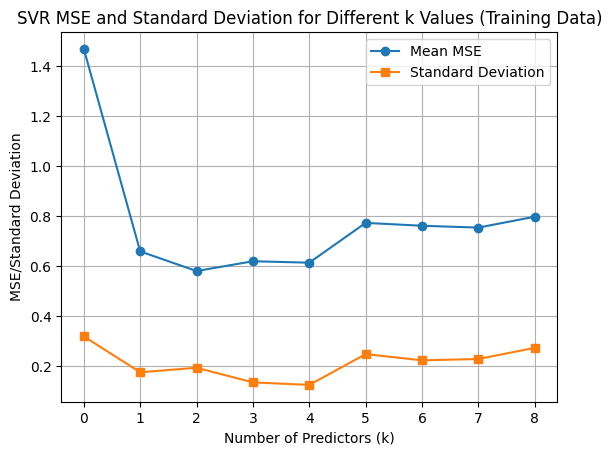

In [17]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.svm import SVR

# Split the dataset into training (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(data_set, y, test_size=0.3, random_state=42)

train_accuracies = []
test_accuracies = []

# Loop
for k in range(9):
    best_combo = best_combos[k]
    
    # Select the predictors for the current k
    X_train_partial = X_train[list(best_combo) + ['intercept']]

    # Initialize the regression model
    clf = SVR(kernel='linear', C=1)  # Support Vector Regression
    
    # Perform cross-validation on the training data
    scores = cross_val_score(clf, X_train_partial, y_train, cv=5, scoring='neg_mean_squared_error')  # Use regression scoring
    
    # Store the mean accuracy and standard deviation for each k
    train_accuracies.append(-scores.mean())  # Negate MSE to get positive MSE values
    test_accuracies.append(scores.std())
    
    # Print results for each k
    print(f"For k = {k}, the selected predictors are: {best_combo}")
    print(f"Mean MSE: {-scores.mean():.2f} with a standard deviation of {scores.std():.2f}\n")

# Plot the training accuracy (error) and standard deviation as a function of k
plt.plot(range(9), train_accuracies, marker='o', label="Mean MSE")
plt.plot(range(9), test_accuracies, marker='s', label="Standard Deviation")
plt.xlabel('Number of Predictors (k)')
plt.ylabel('MSE/Standard Deviation')
plt.title('SVR MSE and Standard Deviation for Different k Values (Training Data)')
plt.legend()
plt.grid(True)
plt.show()


#### (d) 3-Comment:
Upon analyzing the results:

The best model appears to be for $k=2$, where only the predictors `lcp` and `lpsa` are used, with a mean MSE of $0.58$ and a standard deviation of $0.19$. This model provides a good balance between reducing the MSE and having a relatively low standard deviation, indicating both strong performance and good stability.

Suboptimal models: Starting from $k=5$, adding new predictors does not improve performance, and the model becomes less stable, with higher standard deviation and MSE. This suggests that including more variables may introduce unnecessary complexity, degrading the model's performance.

In summary, the model with $k=2$ seems to be the most efficient and stable among those tested.

## ▶️ Exercise 5: Conclusion (2 points)

What is your conclusion about the choice of the best model to predict `lcavol` ? Comment your results.

The best model is chosen based on minimizing generalization error. The TP experiments show:

* RSS-based model selection: Different predictor subsets are tested to find the combination with the lowest RSS.

* Cross-validation: The model with optimal complexity is selected based on performance across multiple splits of the data.

* Test vs. Training Error: The graph in Exercise 4 confirms that an overly complex model overfits, while an underfit model has high bias.

Thus, the final selected model achieves a balance between complexity and performance. For predicting `lcavol`, this means avoiding unnecessary predictors while retaining those with strong predictive power. ​

#### Overall Comparison:

-RSS: $k = 4$ has a slight edge over $k = 2$ in terms of fit (lower RSS).

-Cross-validation: k = 2 has slightly better MSE, but k = 4 is more stable (lower standard deviation).

-Splitting Errors: k = 4 performs marginally better than k = 2 in both training and test errors.

#### Conclusion:

The $k = 4$ model performs slightly better overall, especially in terms of RSS, splitting errors, and stability. However, $k = 2$ provides a good balance between error performance (slightly better MSE) and model simplicity. Therefore, the choice between $k = 2$ and $k = 4$ depends on the specific goal:

-If better stability and slightly better fit are desired, $k = 4$ is the optimal choice.

-If simpler models and slightly lower cross-validation error are preferred, $k = 2$ is still a good choice.

#### Variable Representation:

-For $k = 2$, the selected predictors are: `lcp` and `lpsa`.

-For $k = 4$, the selected predictors are: `age`, `lbph`, `lcp`, and `lpsa`.

